
📌 Columnas disponibles en el archivo: ['name', 'usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific', 'Score', 'Unnamed: 9', 'targets', 'targets.1', 'avg', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'name.1', 'usablegc.1', 'usablevc.1', 'density.1', 'porosity.1', 'Ri.1', 'ssa.1', 'specific.1', 'score', 'Unnamed: 29']

=== VIF (Factor de Inflación de Varianza) ===
    Variable        VIF
0  Constante  49.380134
1    density   4.458714
2   porosity  10.017391
3         Ri   3.120173
4        ssa   7.969900
5   specific   6.025606

📈 Evaluación del modelo:
🔹 MAE: 0.427818
🔹 R²: 0.853911

=== Resumen del Modelo de Regresión ===
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic

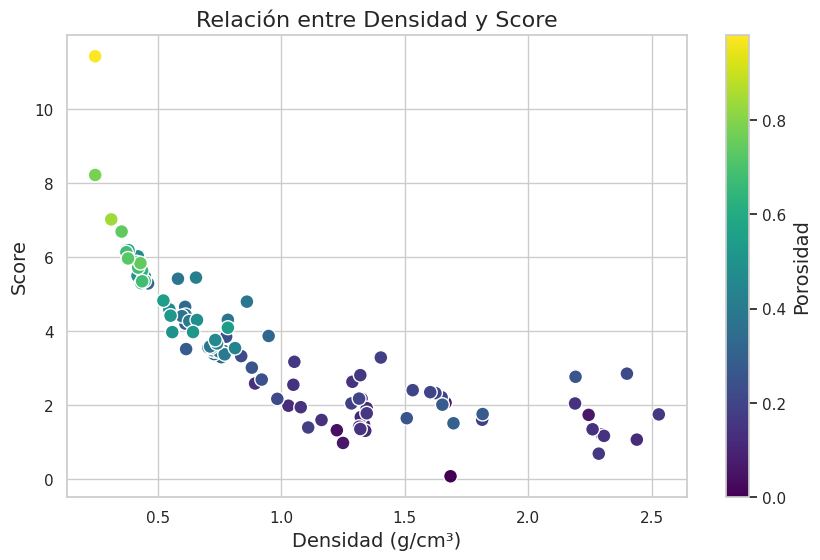

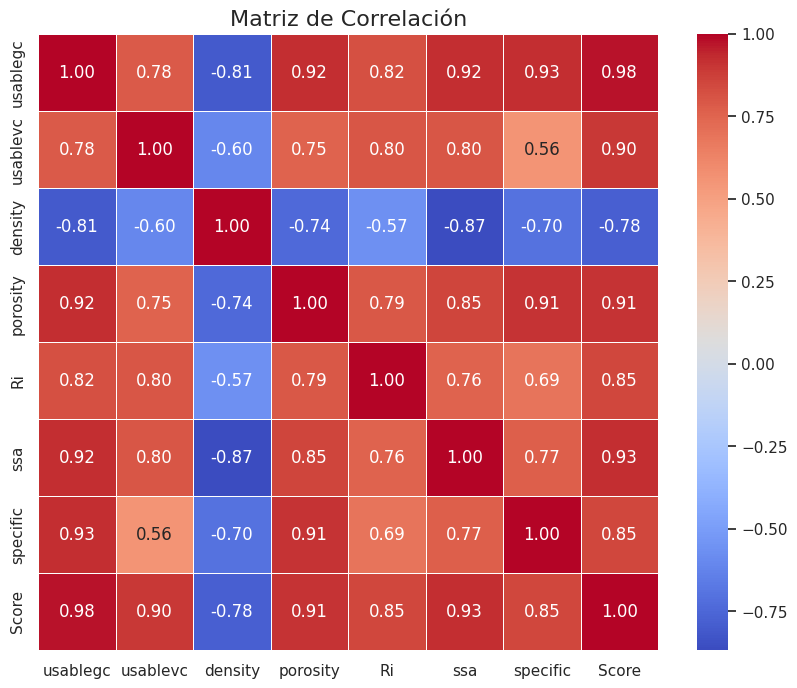

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el archivo Excel
def cargar_datos(file_path, sheet_name):
    """
    Carga los datos desde un archivo Excel.
    """
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"\n📌 Columnas disponibles en el archivo: {df.columns.tolist()}")
    return df

# Función para graficar dispersión Density vs Score, coloreado por Porosity
def graficar_dispersion(data):
    """
    Grafica la relación entre densidad y score, coloreando por porosidad.
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        data['density'],
        data['Score'],
        c=data['porosity'],
        cmap='viridis',
        s=100,
        edgecolors='w'
    )
    plt.title('Relación entre Densidad y Score', fontsize=16)
    plt.xlabel('Densidad (g/cm³)', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Porosidad', fontsize=14)
    plt.grid(True)
    plt.show()

# Función para graficar la matriz de correlación
def graficar_matriz_correlacion(data):
    """
    Grafica la matriz de correlación de las variables.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        data.corr(),
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        linewidths=0.5
    )
    plt.title('Matriz de Correlación', fontsize=16)
    plt.show()

# Función principal
def main():
    # Cargar el archivo Excel
    file_path = "EXCEL_TFG.xlsx"
    sheet_name = "structuralparameters-vs-capacit"
    df = cargar_datos(file_path, sheet_name)

    # Selección de columnas
    columnas = ['usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific', 'Score']
    data = df[columnas].dropna()

    # Variables independientes y dependiente
    X = data[['density', 'porosity', 'Ri', 'ssa', 'specific']]
    y = data['Score']

    # Normalización y transformación polinómica
    scaler = MinMaxScaler()
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_scaled = scaler.fit_transform(X_poly)

    # División en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Análisis de multicolinealidad (VIF) - Usar las características originales
    X_const = sm.add_constant(X)  # Usar X original para VIF
    vif = pd.DataFrame()
    vif["Variable"] = ["Constante"] + list(X.columns)
    vif["VIF"] = [variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])]
    print("\n=== VIF (Factor de Inflación de Varianza) ===")
    print(vif)

    # Ajustar el modelo de regresión
    X_train_const = sm.add_constant(X_train)  # Añadir constante para el modelo
    modelo = sm.OLS(y_train, X_train_const).fit()

    # Evaluación del modelo
    X_test_const = sm.add_constant(X_test)  # Añadir constante para la predicción
    y_pred = modelo.predict(X_test_const)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("\n📈 Evaluación del modelo:")
    print(f"🔹 MAE: {mae:.6f}")
    print(f"🔹 R²: {r2:.6f}")

    # Resultados del modelo
    print("\n=== Resumen del Modelo de Regresión ===")
    print(modelo.summary())

    # Graficar resultados
    graficar_dispersion(data)
    graficar_matriz_correlacion(data)

if __name__ == "__main__":
    main()

Columnas disponibles en el archivo: ['name', 'usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific', 'Score', 'Unnamed: 9', 'targets', 'targets.1', 'avg', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'name.1', 'usablegc.1', 'usablevc.1', 'density.1', 'porosity.1', 'Ri.1', 'ssa.1', 'specific.1', 'score', 'Unnamed: 29']
Usando columnas para entrenamiento: ['density', 'porosity', 'Ri', 'ssa', 'specific']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.882e-01, tolerance: 9.692e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e-01, tolerance: 1.147e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.660e-01, tolerance: 9.621e


📈 Resultados del modelo Ridge:
GC - MAE: 0.180746, R²: 0.943777
VC - MAE: 0.001896, R²: 0.628878

📈 Resultados del modelo LASSO:
GC - MAE: 0.187458, R²: 0.942474
VC - MAE: 0.001939, R²: 0.557192

🌳 Resultados del modelo Random Forest:
GC - MAE: 0.192959, R²: 0.934598
VC - MAE: 0.001936, R²: 0.600255

🔬 Nuevo material generado:
density        1.016849
porosity       0.330000
Ri             5.806981
ssa         2741.917925
specific       0.555665
usablegc       1.710021
usablevc       0.011970
dtype: float64

 Evaluación del nuevo material:
Cumple usablegc (>= 5.5 wt.%): No
Cumple usablevc (>= 0.020 kg/L): No


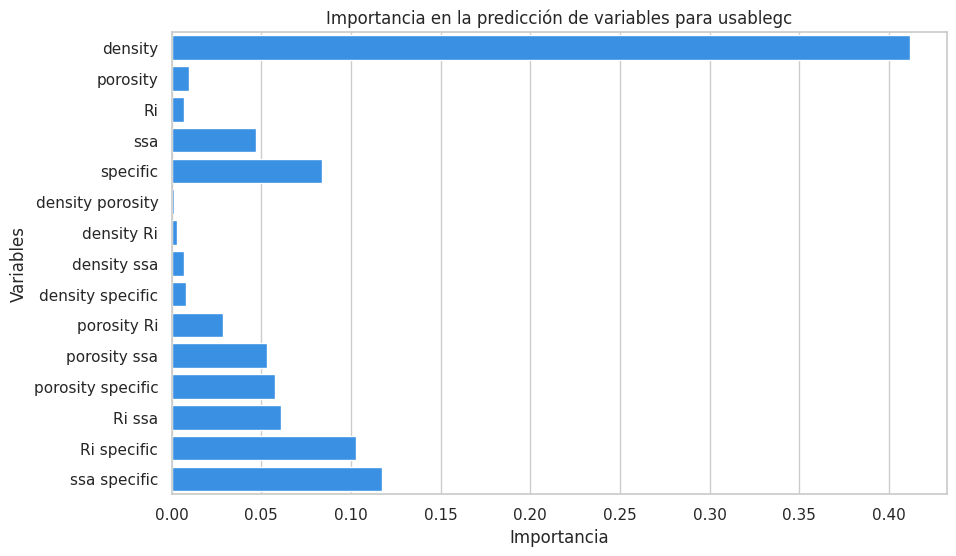

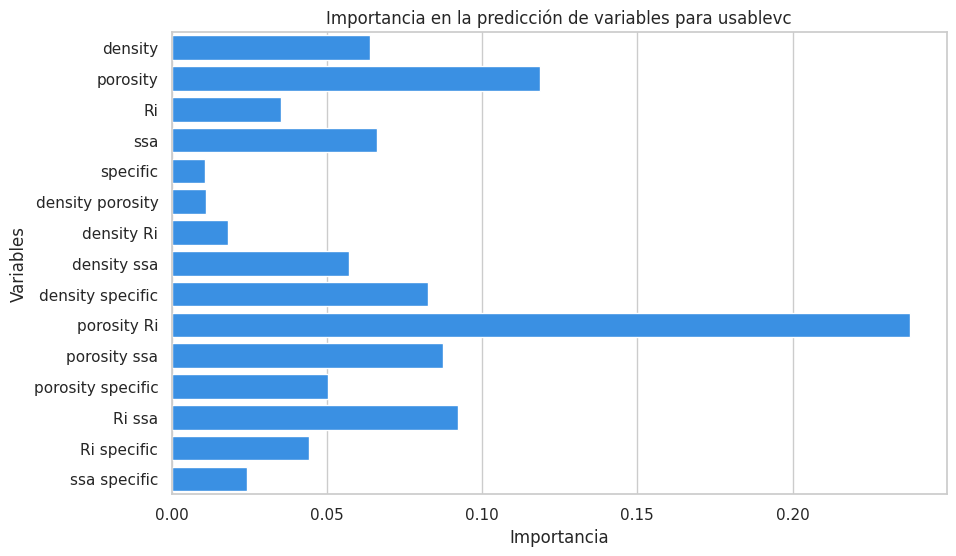

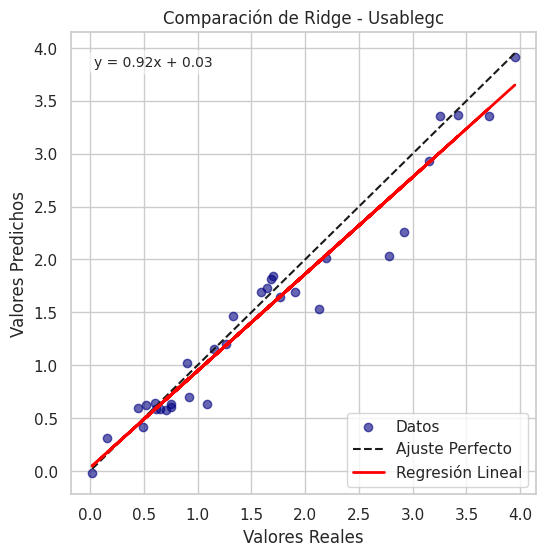

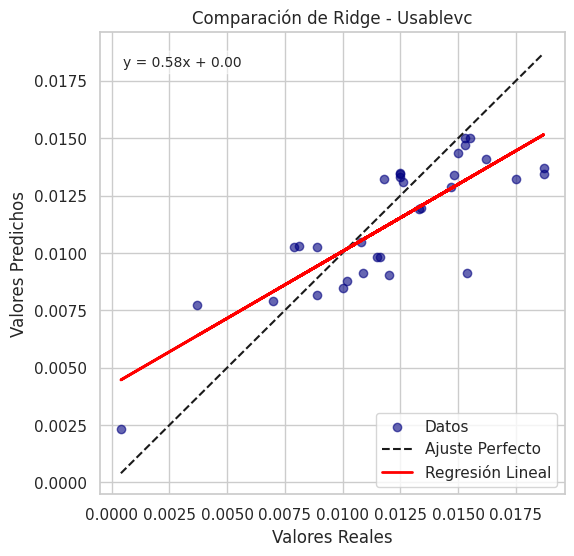

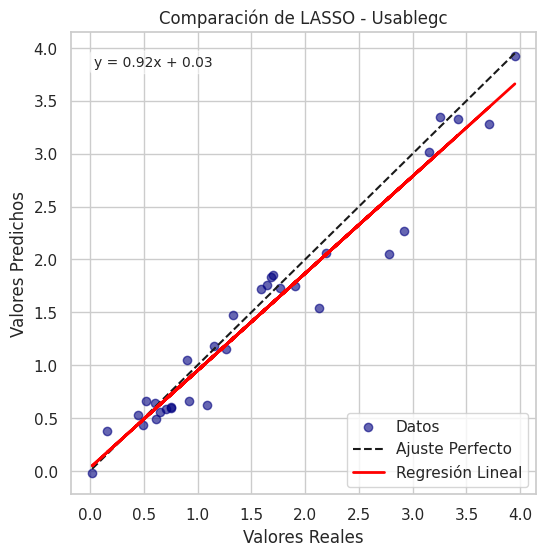

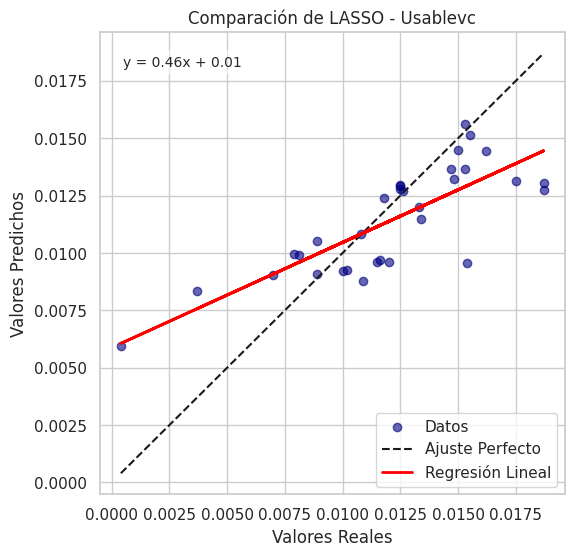

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures


# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el archivo Excel con datos reales
def cargar_datos(file_path, sheet_name):
    """
    Carga los datos desde un archivo Excel.
    """
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"Columnas disponibles en el archivo: {df.columns.tolist()}")
    return df

def preprocesar_datos(df, grado=2):
    """
    Aplica transformación polinómica y normaliza los datos antes de dividirlos en entrenamiento y prueba.
    """
    scaler = MinMaxScaler()
    poly = PolynomialFeatures(degree=grado, interaction_only=True, include_bias=False)

    columnas_necesarias = ['density', 'porosity', 'Ri', 'ssa', 'specific']
    columnas_presentes = [col for col in columnas_necesarias if col in df.columns]

    print(f"Usando columnas para entrenamiento: {columnas_presentes}")

    X = df[columnas_presentes]

    # 🔹 Ajustar `poly` y `scaler`
    X_poly = poly.fit_transform(X)
    scaler.fit(X_poly)

    X_scaled = scaler.transform(X_poly)

    y_gc = df['usablegc']
    y_vc = df['usablevc']

    return (
        train_test_split(X_scaled, y_gc, test_size=0.3, random_state=42),
        train_test_split(X_scaled, y_vc, test_size=0.3, random_state=42),
        scaler,  # Pasamos scaler AJUSTADO
        poly     # Pasamos poly AJUSTADO
    )



# Ajustar modelo
def ajustar_modelo(X_train, y_train, modelo, param_grid):
    """
    Optimiza hiperparámetros mediante validación cruzada.
    """
    grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Evaluar modelo
def evaluar_modelo(modelo, X_test, y_test):
    """
    Calcula MAE y R² y verifica si los resultados cumplen los objetivos del estudio.
    """
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae, r2, y_pred


# Generar un nuevo material combinando características óptimas
def generar_material_optimo(df, modelo_gc, modelo_vc, scaler, poly):
    """
    Usa la media ponderada de los materiales existentes para generar uno nuevo y evaluar su desempeño.
    """
    X = df[['density', 'porosity', 'Ri', 'ssa', 'specific']]

    # 🔹 Ajustar el objeto PolynomialFeatures con fit
    X_poly = poly.fit_transform(X)
    poly.fit(X)
    scaler.fit(X_poly)

    # 🔹 Aplicar transformación con el modelo polinómico ya ajustado
    X_poly = poly.transform(X)
    X_scaled = scaler.transform(X_poly)

    usablegc_pred = modelo_gc.predict(X_scaled)
    usablevc_pred = modelo_vc.predict(X_scaled)

    nuevo_material = df[['density', 'porosity', 'Ri', 'ssa', 'specific']].mean()
    nuevo_material['usablegc'] = np.mean(usablegc_pred)
    nuevo_material['usablevc'] = np.mean(usablevc_pred)

    print("\n🔬 Nuevo material generado:")
    print(nuevo_material)

    return nuevo_material

# Aplicar restricciones después del modelo
def verificar_restricciones(material):
    """
    Evalúa si el material generado cumple con los objetivos establecidos.
    """
    cumple_gc = material['usablegc'] >= 5.5
    cumple_vc = material['usablevc'] >= 0.020

    print("\n Evaluación del nuevo material:")
    print(f"Cumple usablegc (>= 5.5 wt.%): {'Sí' if cumple_gc else 'No'}")
    print(f"Cumple usablevc (>= 0.020 kg/L): {'Sí' if cumple_vc else 'No'}")

def graficar_importancia(modelo, poly, df,title):
    importances = modelo.feature_importances_
    features = poly.get_feature_names_out(df[['density', 'porosity', 'Ri', 'ssa', 'specific']].columns)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=features, color='dodgerblue')
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title(title)
    plt.savefig('importancia_variables.png', dpi=300)  # Guardar imagen para LaTeX
    plt.show()


def graficar_predicciones(y_test, y_pred, modelo_nombre):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='navy', label='Datos')

    # Línea de ajuste perfecto
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ajuste Perfecto')

    # Línea de regresión
    # Convertimos a arrays 2D para sklearn
    X = y_test.values.reshape(-1, 1) if hasattr(y_test, 'values') else np.array(y_test).reshape(-1, 1)
    y = y_pred.reshape(-1, 1) if hasattr(y_pred, 'values') else np.array(y_pred).reshape(-1, 1)

    reg = LinearRegression().fit(X, y)
    y_reg = reg.predict(X)
    plt.plot(X, y_reg, color='red', linewidth=2, label='Regresión Lineal')

    # Ecuación de la regresión
    eq_text = f'y = {reg.coef_[0][0]:.2f}x + {reg.intercept_[0]:.2f}'
    plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title(f'Comparación de {modelo_nombre}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'predicciones_{modelo_nombre}.png', dpi=300)
    plt.show()

# Función principal
def main():
    # Cargar datos reales desde Excel
    file_path = "EXCEL_TFG.xlsx"
    sheet_name = "structuralparameters-vs-capacit"
    df = cargar_datos(file_path, sheet_name)

    # Preprocesar datos con transformación polinómica (grado 2)
    (train_gc, test_gc, scaler, poly) = preprocesar_datos(df, grado=2)

    # Desempaquetar los conjuntos de datos
    X_train_gc, X_test_gc, y_train_gc, y_test_gc = train_gc
    X_train_vc, X_test_vc, y_train_vc, y_test_vc = test_gc

    # === RIDGE: Ajuste para GC y VC ===
    param_grid = {'alpha': np.logspace(-4, 4, 20)}

    modelo_ridge_gc = ajustar_modelo(X_train_gc, y_train_gc, Ridge(), param_grid)
    modelo_ridge_vc = ajustar_modelo(X_train_vc, y_train_vc, Ridge(), param_grid)

    mae_ridge_gc, r2_ridge_gc, y_pred_ridge_gc = evaluar_modelo(modelo_ridge_gc, X_test_gc, y_test_gc)
    mae_ridge_vc, r2_ridge_vc, y_pred_ridge_vc = evaluar_modelo(modelo_ridge_vc, X_test_vc, y_test_vc)

    # === LASSO: Ajuste para GC y VC ===
    modelo_lasso_gc = ajustar_modelo(X_train_gc, y_train_gc, Lasso(), param_grid)
    modelo_lasso_vc = ajustar_modelo(X_train_vc, y_train_vc, Lasso(), param_grid)

    mae_lasso_gc, r2_lasso_gc, y_pred_lasso_gc = evaluar_modelo(modelo_lasso_gc, X_test_gc, y_test_gc)
    mae_lasso_vc, r2_lasso_vc, y_pred_lasso_vc = evaluar_modelo(modelo_lasso_vc, X_test_vc, y_test_vc)

    # Resultados
    print(f"\n📈 Resultados del modelo Ridge:")
    print(f"GC - MAE: {mae_ridge_gc:.6f}, R²: {r2_ridge_gc:.6f}")
    print(f"VC - MAE: {mae_ridge_vc:.6f}, R²: {r2_ridge_vc:.6f}")

    print(f"\n📈 Resultados del modelo LASSO:")
    print(f"GC - MAE: {mae_lasso_gc:.6f}, R²: {r2_lasso_gc:.6f}")
    print(f"VC - MAE: {mae_lasso_vc:.6f}, R²: {r2_lasso_vc:.6f}")

    # === Random Forest ===
    param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}

    modelo_rf_gc = ajustar_modelo(X_train_gc, y_train_gc, RandomForestRegressor(), param_grid_rf)
    modelo_rf_vc = ajustar_modelo(X_train_vc, y_train_vc, RandomForestRegressor(), param_grid_rf)

    mae_rf_gc, r2_rf_gc, _ = evaluar_modelo(modelo_rf_gc, X_test_gc, y_test_gc)
    mae_rf_vc, r2_rf_vc, _ = evaluar_modelo(modelo_rf_vc, X_test_vc, y_test_vc)

    print(f"\n🌳 Resultados del modelo Random Forest:")
    print(f"GC - MAE: {mae_rf_gc:.6f}, R²: {r2_rf_gc:.6f}")
    print(f"VC - MAE: {mae_rf_vc:.6f}, R²: {r2_rf_vc:.6f}")

    # === Generar nuevo material y verificar restricciones ===
    nuevo_material = generar_material_optimo(df, modelo_ridge_gc, modelo_ridge_vc, scaler, poly)
    verificar_restricciones(nuevo_material)

    # === Gráficos de importancia ===
    graficar_importancia(modelo_rf_gc, poly, df, "Importancia en la predicción de variables para usablegc")
    graficar_importancia(modelo_rf_vc, poly, df, "Importancia en la predicción de variables para usablevc")

    # === Gráficos de predicciones ===
    graficar_predicciones(y_test_gc, y_pred_ridge_gc, "Ridge - Usablegc")
    graficar_predicciones(y_test_vc, y_pred_ridge_vc, "Ridge - Usablevc")
    graficar_predicciones(y_test_gc, y_pred_lasso_gc, "LASSO - Usablegc")
    graficar_predicciones(y_test_vc, y_pred_lasso_vc, "LASSO - Usablevc")




if __name__ == "__main__":
    main()


In [ ]:
def guardar_datos_para_graficos(df, poly, modelo_rf, y_test_gc, y_pred_gc, y_test_vc, y_pred_vc, evolucion_df=None):
    """
    Guarda los datos utilizados en los gráficos en un archivo Excel.
    """
    writer = pd.ExcelWriter("datos_para_graficos.xlsx", engine="openpyxl")

    # 1. Datos de importancia de variables
    features = poly.get_feature_names_out(df[['density', 'porosity', 'Ri', 'ssa', 'specific']].columns)
    importancias = modelo_rf.feature_importances_
    df_importancia = pd.DataFrame({'Variable': features, 'Importancia': importancias})
    df_importancia.to_excel(writer, sheet_name='importancia_variables', index=False)

    # 2. Datos de predicción Ridge
    df_ridge = pd.DataFrame({'y_test': y_test_gc, 'y_pred': y_pred_gc})
    df_ridge.to_excel(writer, sheet_name='predicciones_Ridge', index=False)

    # 3. Datos de predicción LASSO
    df_lasso = pd.DataFrame({'y_test': y_test_vc, 'y_pred': y_pred_vc})
    df_lasso.to_excel(writer, sheet_name='predicciones_LASSO', index=False)

    # 4. Datos de evolución candidatos (si están disponibles)
    if evolucion_df is not None:
        evolucion_df.to_excel(writer, sheet_name='evolucion_candidatos', index=False)

    writer.close()
    print("✅ Datos guardados en 'datos_para_graficos.xlsx'")




Columnas disponibles en el archivo: ['name', 'usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific', 'Score', 'Unnamed: 9', 'targets', 'targets.1', 'avg', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'name.1', 'usablegc.1', 'usablevc.1', 'density.1', 'porosity.1', 'Ri.1', 'ssa.1', 'specific.1', 'score', 'Unnamed: 29']


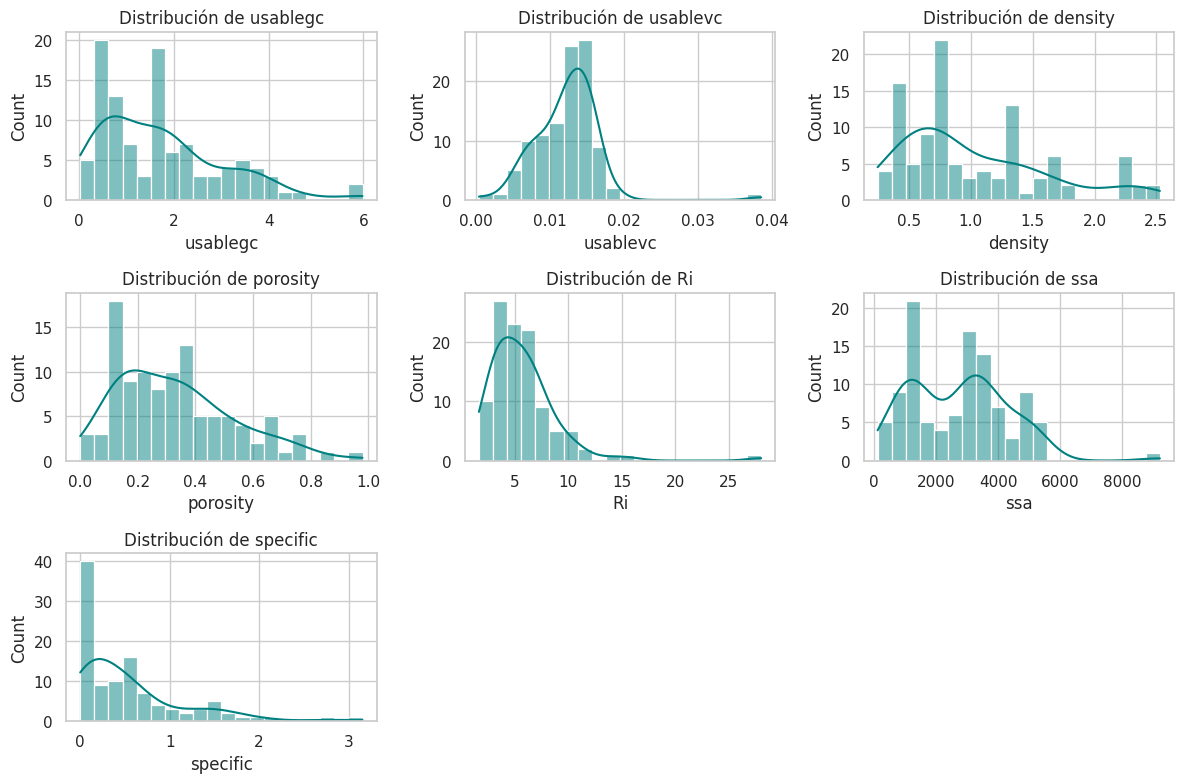

In [ ]:
file_path = "EXCEL_TFG.xlsx"
sheet_name = "structuralparameters-vs-capacit"
df = cargar_datos(file_path, sheet_name)

def graficar_histogramas(df):
    variables = ['usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific']
    plt.figure(figsize=(12, 8))

    for i, var in enumerate(variables, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[var], bins=20, kde=True, color="teal")
        plt.title(f'Distribución de {var}')

    plt.tight_layout()
    plt.savefig('histogramas.png', dpi=300)  # Guardar imagen para LaTeX
    plt.show()

graficar_histogramas(df)


In [ ]:
"HOJA 2 EXCEL"
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


# Ajustar el modelo usando fórmula
modelo_formula_vc = smf.ols("usablevc ~ density + porosity + Ri + ssa + specific", data=df).fit()
modelo_formula_gc = smf.ols("usablegc ~ density + porosity + Ri + ssa + specific", data=df).fit()
# Mostrar resumen del modelo
print(modelo_formula_vc.summary())

# ANOVA
anova = anova_lm(modelo_formula_vc, typ=2)
print("\n🔬 ANOVA:")
print(anova)


                            OLS Regression Results                            
Dep. Variable:               usablevc   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     82.81
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.66e-34
Time:                        14:48:52   Log-Likelihood:                 513.19
No. Observations:                 106   AIC:                            -1014.
Df Residuals:                     100   BIC:                            -998.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.001      1.404      0.1

In [ ]:
# Ampliar los límites un X% - se elige ahí
def expand_range(col):
    mini, maxi = df[col].min(), df[col].max()
    margin = (maxi - mini) * 0.20
    return mini - margin, maxi + margin

bounds_expanded = {col: expand_range(col) for col in ['density', 'porosity', 'Ri', 'ssa', 'specific']}

# Volver a generar combinaciones
n = 100000
X_rand_exp = pd.DataFrame({
    col: np.random.uniform(bounds_expanded[col][0], bounds_expanded[col][1], n)
    for col in bounds_expanded
})

# Predecir
X_rand_exp['pred_gc'] = modelo_formula_gc.predict(X_rand_exp)
X_rand_exp['pred_vc'] = modelo_formula_vc.predict(X_rand_exp)

# Filtrar
buenos_ext = X_rand_exp[(X_rand_exp['pred_gc'] >= 5.5) & (X_rand_exp['pred_vc'] >= 0.04)]

if buenos_ext.empty:
    print("❌ Ni siquiera extrapolando fuera del rango se encuentra un material válido.")
else:
    print(f"✅ Se encontraron {len(buenos_ext)} candidatos extrapolando.")
    display(buenos_ext.iloc[0])


✅ Se encontraron 328 candidatos extrapolando.


,27
density,1.188164
porosity,0.668316
Ri,27.900033
ssa,10924.351660
specific,0.288186
pred_gc,5.559028
pred_vc,0.042072


In [ ]:
# Mostrar los 5 mejores (ordenados por usablegc)
top = buenos_ext.sort_values(by='pred_gc', ascending=False).head(5)
display(top)


,density,porosity,Ri,ssa,specific,pred_gc,pred_vc


In [ ]:
# Reutilizamos bounds_expanded de antes
X_rand_rf = pd.DataFrame({
    col: np.random.uniform(bounds_expanded[col][0], bounds_expanded[col][1], 100000)
    for col in bounds_expanded
})

# Predecir usablegc
X_rand_rf['pred_gc'] = modelo_formula_gc.predict(X_rand_rf)

# Predecir usablevc usando solo las columnas originales
X_rand_rf['pred_vc'] = modelo_formula_vc.predict(X_rand_rf[['density', 'porosity', 'Ri', 'ssa', 'specific']])


# Filtrar los candidatos válidos
rf_candidatos = X_rand_rf[(X_rand_rf['pred_gc'] >= 5.5) & (X_rand_rf['pred_vc'] >= 0.04)]

if rf_candidatos.empty:
    print("❌ Random Forest no encontró materiales que cumplan los objetivos.")
else:
    print(f"✅ RF encontró {len(rf_candidatos)} candidatos.")
    display(rf_candidatos.sort_values(by='pred_gc', ascending=False).head(5))


✅ RF encontró 321 candidatos.


,density,porosity,Ri,ssa,specific,pred_gc,pred_vc
45037,1.012924,1.148333,32.663705,10998.139388,2.550129,8.268896,0.040629
83633,0.658730,1.134401,32.521031,11014.630864,2.441615,8.174847,0.040515
23120,2.011471,1.135201,31.238552,10272.626224,2.384347,7.654948,0.040417
14265,2.219070,1.074980,32.862441,10443.057471,2.180974,7.617798,0.041778
66971,1.660738,1.117310,31.204467,10599.688655,2.124641,7.498810,0.041495


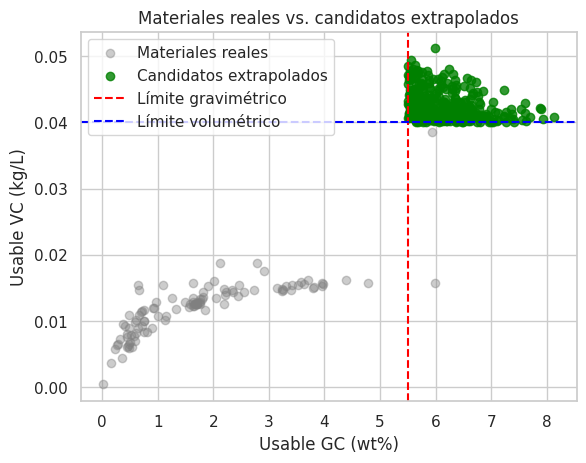

In [ ]:
import matplotlib.pyplot as plt

# Materiales originales
plt.scatter(df['usablegc'], df['usablevc'], alpha=0.4, label='Materiales reales', color='gray')

# Materiales extrapolados viables
plt.scatter(buenos_ext['pred_gc'], buenos_ext['pred_vc'], alpha=0.8, label='Candidatos extrapolados', color='green')

# Líneas de corte
plt.axvline(5.5, color='red', linestyle='--', label='Límite gravimétrico')
plt.axhline(0.04, color='blue', linestyle='--', label='Límite volumétrico')

plt.xlabel('Usable GC (wt%)')
plt.ylabel('Usable VC (kg/L)')
plt.title('Materiales reales vs. candidatos extrapolados')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Asegúrate de que estas columnas existen en tus DataFrames
df_real = df[['usablegc', 'usablevc']].copy()
df_real['tipo'] = 'Material real'

df_extrap = buenos_ext[['pred_gc', 'pred_vc']].copy()
df_extrap = df_extrap.rename(columns={'pred_gc': 'usablegc', 'pred_vc': 'usablevc'})
df_extrap['tipo'] = 'Candidato extrapolado'

# Unimos ambos DataFrames
df_grafico = pd.concat([df_real, df_extrap], ignore_index=True)

# Guardamos en un archivo Excel
df_grafico.to_excel('datos_grafico.xlsx', index=False)

# Si quieres también descargarlo en Google Colab:
from google.colab import files
files.download('datos_grafico.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Variables predictoras y respuesta
X = df[['density', 'porosity', 'Ri', 'ssa', 'specific']]
y_gc = df['usablegc']
y_vc = df['usablevc']

# Dividir datos (opcional, para validación)
X_train, X_test, y_gc_train, y_gc_test = train_test_split(X, y_gc, test_size=0.2, random_state=42)
_, _, y_vc_train, y_vc_test = train_test_split(X, y_vc, test_size=0.2, random_state=42)

# Entrenar modelos Random Forest
rf_gc = RandomForestRegressor(n_estimators=200, random_state=42)
rf_vc = RandomForestRegressor(n_estimators=200, random_state=42)

rf_gc.fit(X_train, y_gc_train)
rf_vc.fit(X_train, y_vc_train)


RandomForestRegressor(n_estimators=200, random_state=42)

✅ Se encontraron 328 candidatos extrapolando.


,27
density,1.188164
porosity,0.668316
Ri,27.900033
ssa,10924.351660
specific,0.288186
pred_gc,5.559028
pred_vc,0.042072


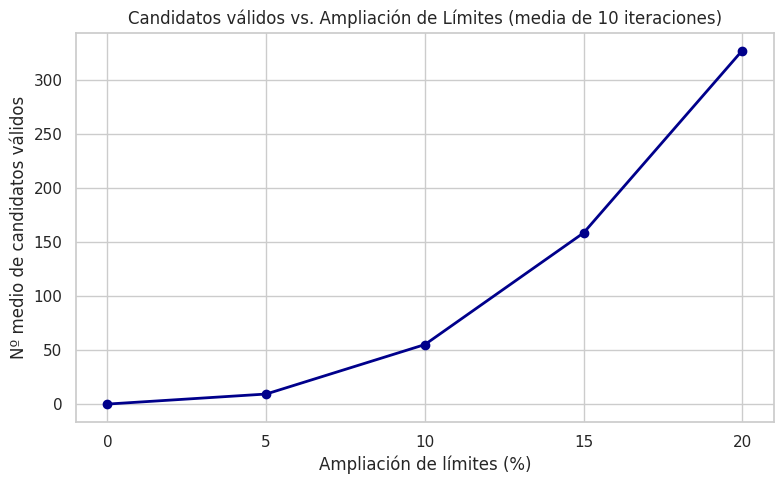

In [ ]:

# Predecir
X_rand_exp['pred_gc'] = modelo_formula_gc.predict(X_rand_exp)
X_rand_exp['pred_vc'] = modelo_formula_vc.predict(X_rand_exp)

# Filtrar
buenos_ext = X_rand_exp[(X_rand_exp['pred_gc'] >= 5.5) & (X_rand_exp['pred_vc'] >= 0.04)]

if buenos_ext.empty:
    print("❌ Ni siquiera extrapolando fuera del rango se encuentra un material válido.")
else:
    print(f"✅ Se encontraron {len(buenos_ext)} candidatos extrapolando.")
    display(buenos_ext.iloc[0])

# Parámetros
porcentajes = np.array([0.00, 0.05, 0.10, 0.15, 0.20])
iteraciones = 10
n_random = 100000
umbral_gc = 5.5
umbral_vc = 0.04

# Guardar medias de candidatos válidos
media_candidatos = []

# Rango original
rangos = {col: (df[col].min(), df[col].max()) for col in X.columns}

for pct in porcentajes:
    resultados_pct = []
    for _ in range(iteraciones):
        # Ampliar rangos
        rangos_expand = {
            col: (
                val[0] - (val[1] - val[0]) * pct,
                val[1] + (val[1] - val[0]) * pct
            ) for col, val in rangos.items()
        }

        # Generar muestra aleatoria
        X_rand = pd.DataFrame({
            col: np.random.uniform(r[0], r[1], n_random)
            for col, r in rangos_expand.items()
        })

        # Predecir
        pred_gc = modelo_formula_gc.predict(X_rand)
        pred_vc = modelo_formula_vc.predict(X_rand)

        # Contar válidos
        validos = np.sum((pred_gc >= umbral_gc) & (pred_vc >= umbral_vc))
        resultados_pct.append(validos)

    # Media para este nivel de ampliación
    media_candidatos.append(np.mean(resultados_pct))

# Graficar resultado
plt.figure(figsize=(8, 5))
plt.plot(porcentajes * 100, media_candidatos, marker='o', color='darkblue', linewidth=2)
plt.title('Candidatos válidos vs. Ampliación de Límites (media de 10 iteraciones)')
plt.xlabel('Ampliación de límites (%)')
plt.ylabel('Nº medio de candidatos válidos')
plt.grid(True)
plt.xticks(porcentajes * 100)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Crear DataFrame con los resultados
evolucion_df = pd.DataFrame({
    'ampliacion_limites_pct': porcentajes * 100,
    'media_candidatos_validos': media_candidatos
})

# Guardar en archivo Excel
evolucion_df.to_excel("evolucion_candidatos.xlsx", index=False)

print("✅ Datos del gráfico guardados en 'evolucion_candidatos.xlsx'")


✅ Datos del gráfico guardados en 'evolucion_candidatos.xlsx'


<ipython-input-42-5f9dd02f4a84>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_largo, x="Característica", y="Valor", palette="Set3")


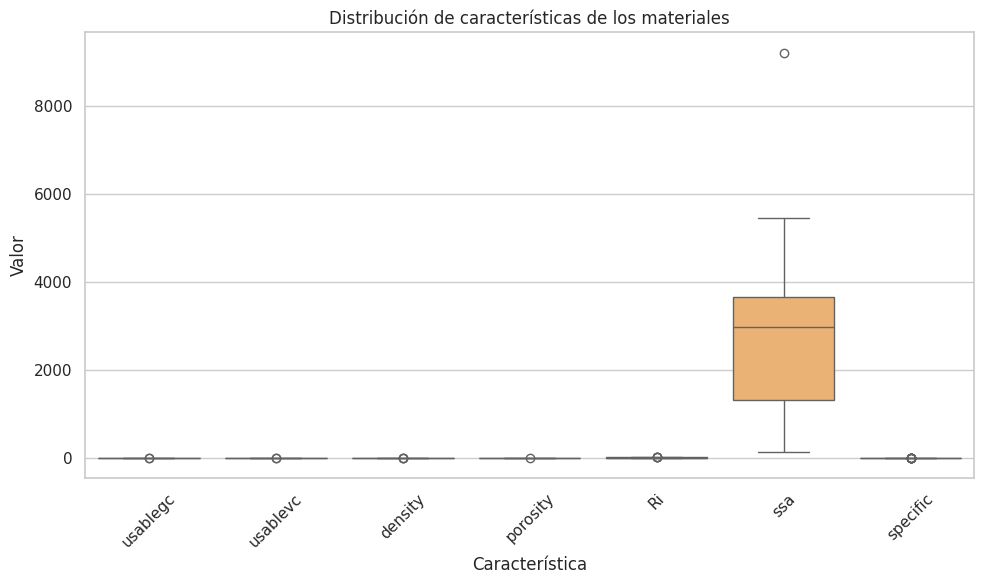

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel (ajusta el nombre si es distinto)
df = pd.read_excel("EXCEL_TFG.xlsx",sheet_name='Sheet1')

# Eliminar la columna de nombres de materiales si la hay
df_numericas = df.drop(columns=[df.columns[0]])

from sklearn.preprocessing import StandardScaler

# Escalado (media 0, varianza 1)
scaler = StandardScaler()
df_escalado = pd.DataFrame(scaler.fit_transform(df_numericas), columns=df_numericas.columns)

# Transformar a formato largo
df_largo = df_numericas.melt(var_name="Característica", value_name="Valor")

# Crear gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_largo, x="Característica", y="Valor", palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de características de los materiales")
plt.tight_layout()
plt.show()


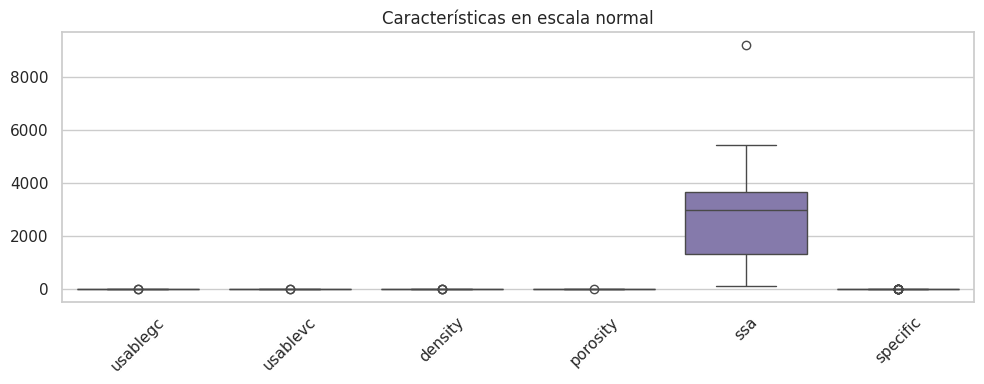

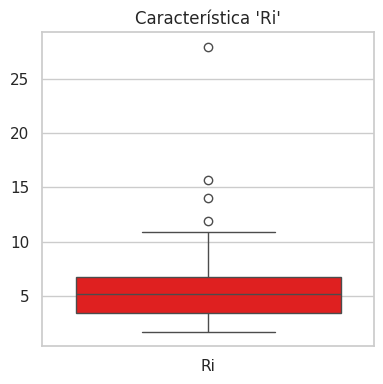

In [ ]:
# Dividir en 2: variables con valores grandes y normales
grandes = ['Ri']
normales = [col for col in df_numericas.columns if col not in grandes]

# Primer gráfico: normales
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_numericas[normales])
plt.title("Características en escala normal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Segundo gráfico: solo ssa
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_numericas[grandes],color='Red')
plt.title("Característica 'Ri'")
plt.tight_layout()
plt.show()


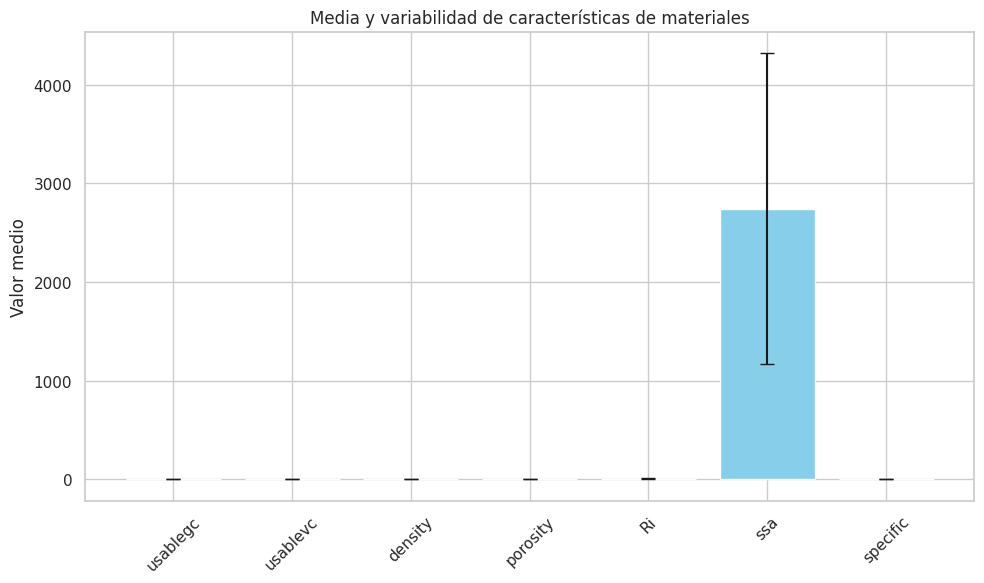

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Estadísticos básicos
media = df_numericas.mean()
std = df_numericas.std()

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(media.index, media.values, yerr=std.values, capsize=5, color='skyblue')
plt.ylabel('Valor medio')
plt.title('Media y variabilidad de características de materiales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


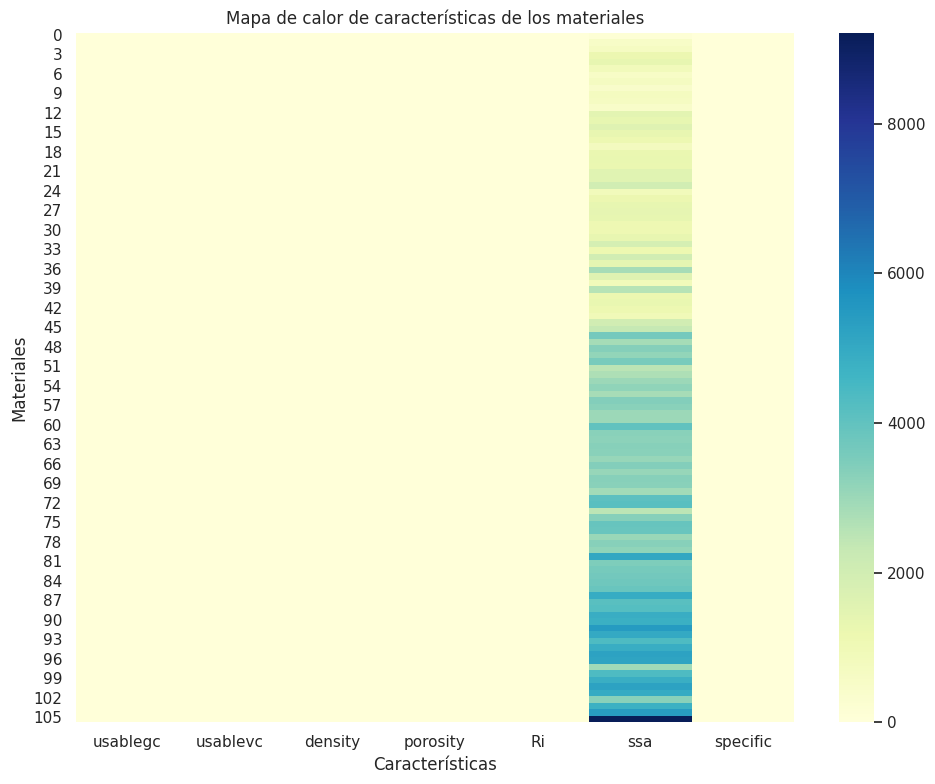

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Mapa de calor de características de los materiales")
plt.xlabel("Características")
plt.ylabel("Materiales")
plt.tight_layout()
plt.show()



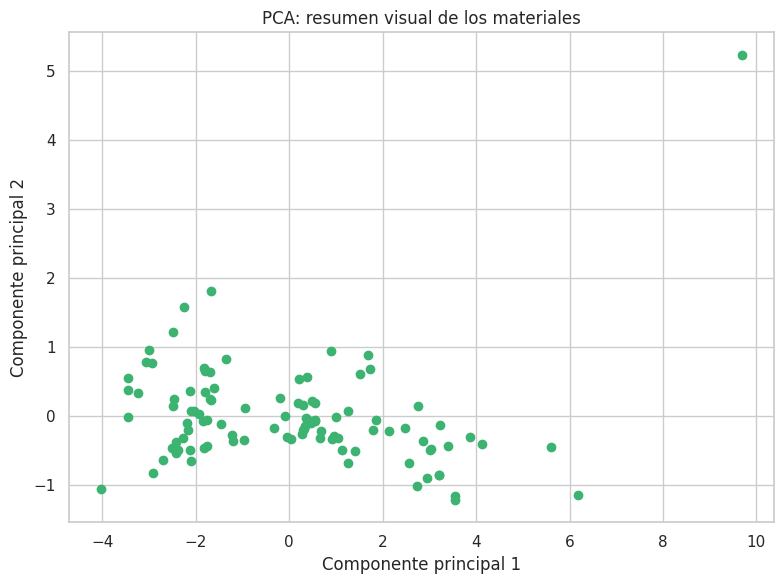

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar antes de PCA
scaled = StandardScaler().fit_transform(df_numericas)

pca = PCA(n_components=2)
comp = pca.fit_transform(scaled)

plt.figure(figsize=(8, 6))
plt.scatter(comp[:, 0], comp[:, 1], c='mediumseagreen')
plt.title("PCA: resumen visual de los materiales")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.tight_layout()
plt.show()


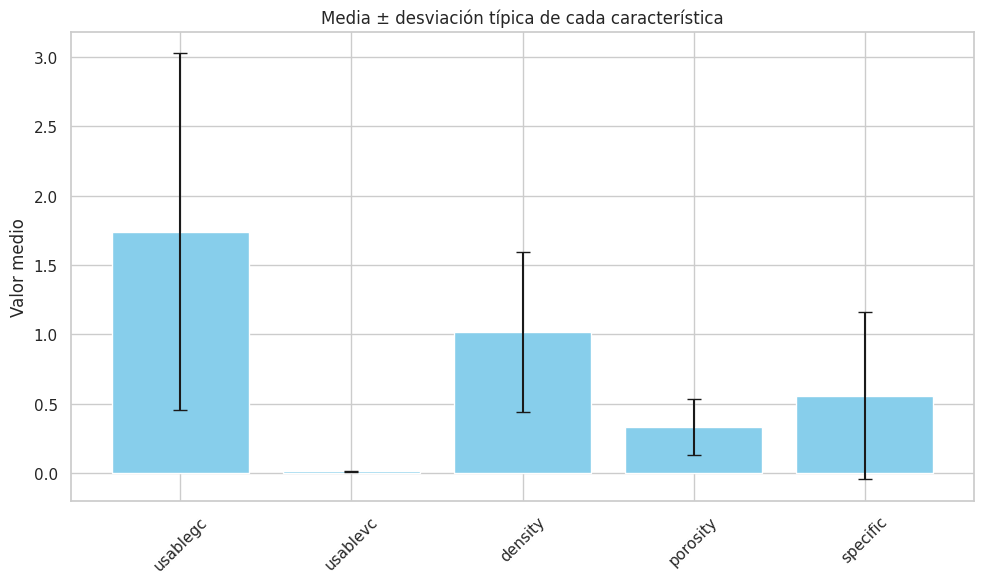

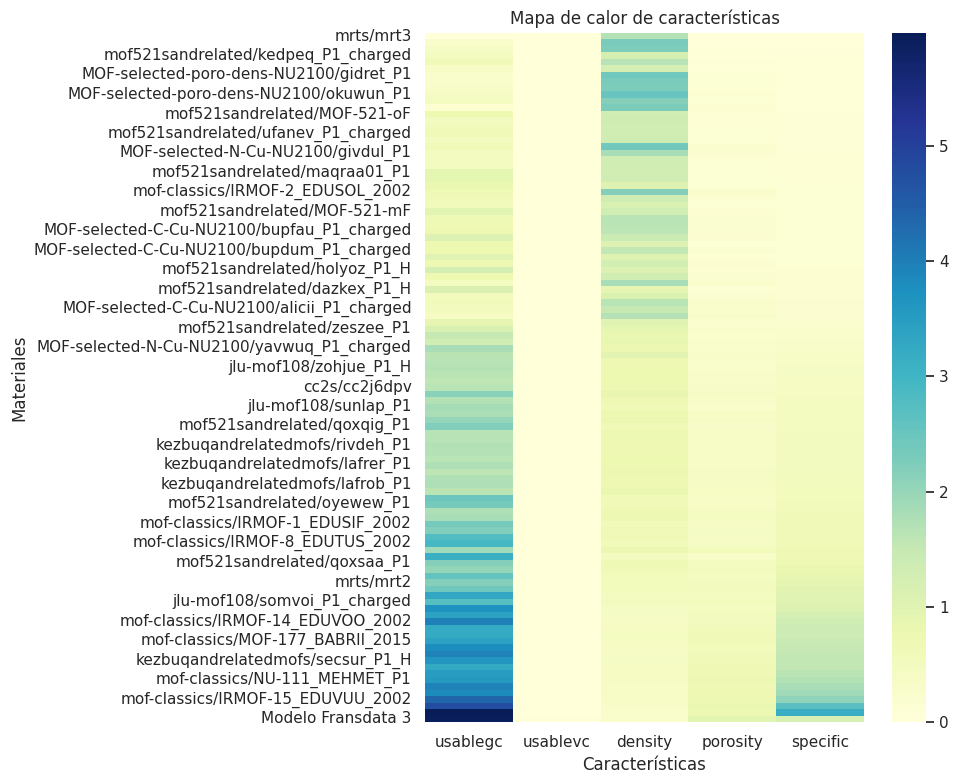

<ipython-input-47-ba1a18930b23>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_largo, x="Característica", y="Valor", palette="Set2")


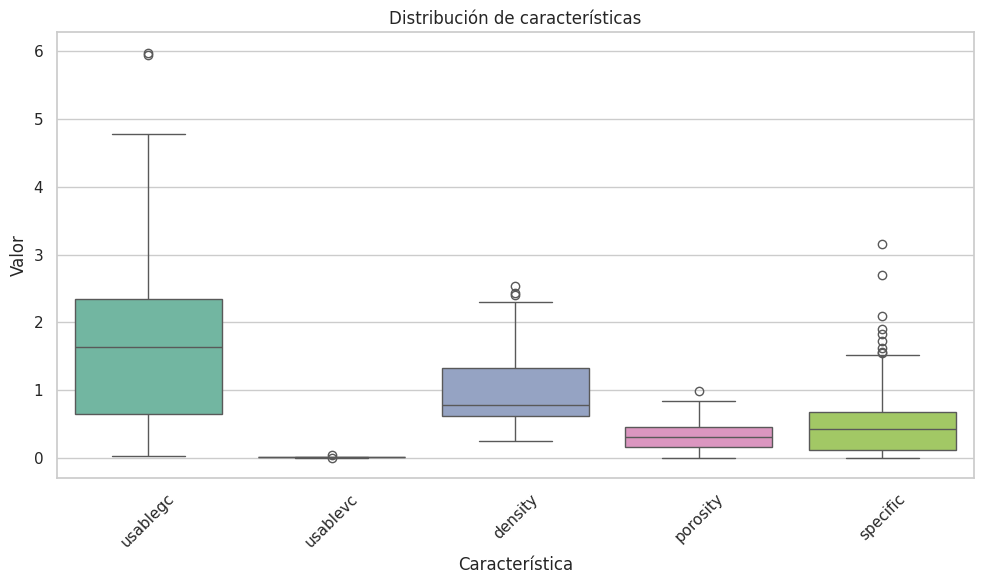

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Cargar el archivo Excel
df = pd.read_excel("EXCEL_TFG.xlsx",sheet_name='Sheet1')

# 2. Eliminar columna de materiales y eliminar 'ssa'
df_numericas = df.drop(columns=[df.columns[0]])  # primera columna = nombres
if 'ssa' in df_numericas.columns:
    df_numericas = df_numericas.drop(columns=['ssa','Ri'])

# ----------------------------------------------
# 📊 GRÁFICO 1: BARRAS CON MEDIA Y DESVIACIÓN TÍPICA
# ----------------------------------------------
media = df_numericas.mean()
std = df_numericas.std()

plt.figure(figsize=(10, 6))
plt.bar(media.index, media.values, yerr=std.values, capsize=5, color='skyblue')
plt.ylabel('Valor medio')
plt.title('Media ± desviación típica de cada característica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 📊 GRÁFICO 2: HEATMAP (MAPA DE CALOR)
# ----------------------------------------------
# Opción: asignar nombres de materiales como índice si están en la primera columna
df_numericas.index = df.iloc[:, 0]  # usa los nombres originales

plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Mapa de calor de características")
plt.xlabel("Características")
plt.ylabel("Materiales")
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 📊 GRÁFICO 3: OPCIONAL - BOX PLOT DE CARACTERÍSTICAS (sin ssa)
# ----------------------------------------------
df_largo = df_numericas.reset_index(drop=True).melt(var_name="Característica", value_name="Valor")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_largo, x="Característica", y="Valor", palette="Set2")
plt.title("Distribución de características")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
